# 데이터 시각화가 필요한 이유
## 앤스콤 4분할 그래프

In [1]:
# 앤스콤 데이터 집합 불러오기

import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [2]:
# matplotlib 라이브러리로 그래프 그리기
# %matplotlib notebook
import matplotlib.pyplot as plt

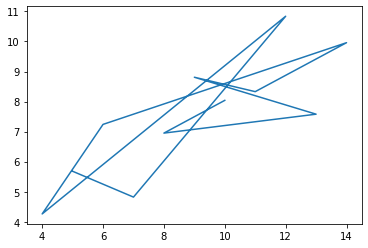

In [3]:
dataset_1 = anscombe[anscombe['dataset']=='I']

# 선 그래프 그리기
plt.plot(dataset_1['x'], dataset_1['y'])

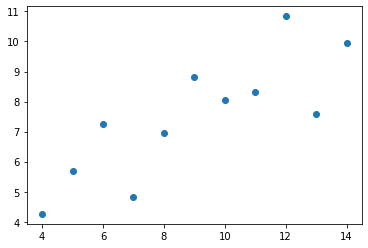

In [4]:
# 세 번째 인자에 o 할당하여 점 그래프 그리기
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

In [5]:
# 한 번에 4개의 그래프 그리기

dataset_2 = anscombe[anscombe['dataset'] == 'II']
dataset_3 = anscombe[anscombe['dataset'] == 'III']
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

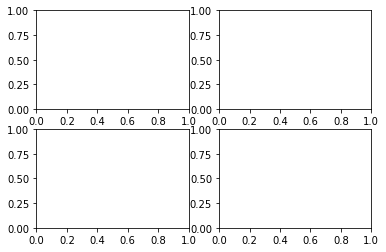

In [6]:
# 기본 틀 생성
fig = plt.figure()

# 그래프 격자 생성
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

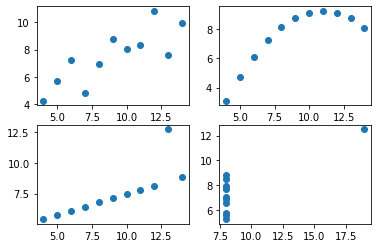

In [7]:
# 그래프 그리기

axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

# 그래프 확인 시 fig 입력
fig

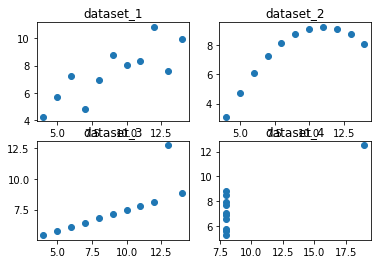

In [9]:
# 그래프 격자에 제목 추가

axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

fig

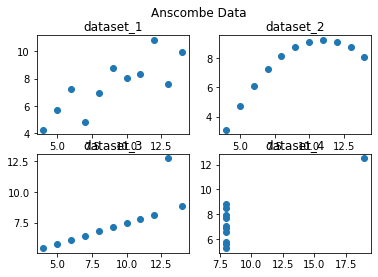

In [10]:
# 기본 틀에 제목 추가

fig.suptitle("Anscombe Data")
fig

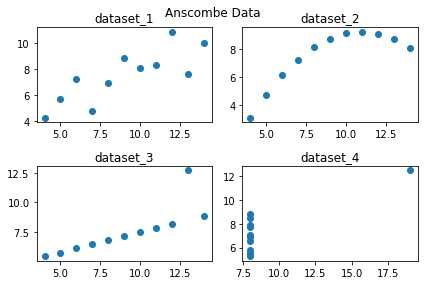

In [11]:
# 그래프 레이아웃 조절

fig.tight_layout()

fig

# matplotlib 라이브러리 자유자재로 사용하기

## 기초그래프 그리기

In [13]:
# tips 데이터 불러오기

tips = sns.load_dataset("tips")
print(tips.head())
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


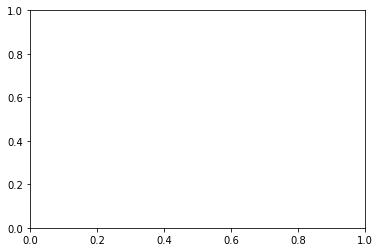

In [14]:
# 기본 틀 생성, 그래프 격자 구성

fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)

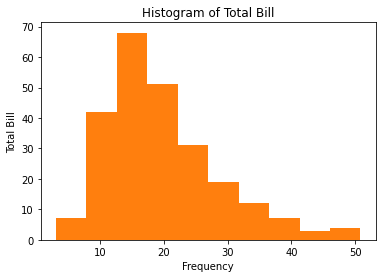

In [16]:
# 히스토그램

axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')

fig

Text(0, 0.5, 'Tip')

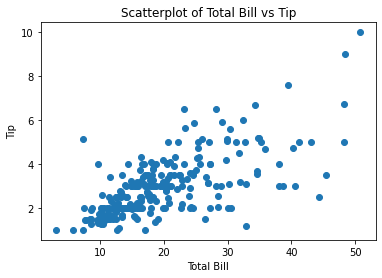

In [17]:
# 산점도(이변량) 그래프

scatter_plot = plt.figure()

axes1 = scatter_plot.add_subplot(1, 1, 1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Boxplot of Tips by Sex')

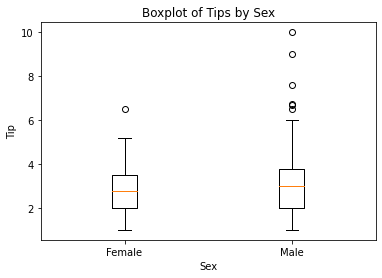

In [18]:
# 박스 그래프

boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)

axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
               tips[tips['sex'] == 'Male']['tip']],
              labels = ['Female', 'Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Sex')

Text(0, 0.5, 'Tip')

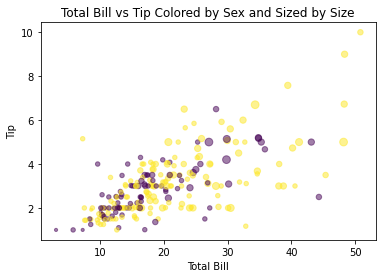

In [19]:
# 다변량 그래프 : 변수 3개 이상 사용

# 문자열을 정수로 치환하는 함수 생성
def recode_sex(sex):
  if sex == 'Female':
    return 0
  else:
    return 1

# sex_color 열 추가
tips['sex_color'] = tips['sex'].apply(recode_sex)

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size']*10,
    c=tips['sex_color'],
    alpha=0.5
)
axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

# seaborn 라이브러리 자유자재로 사용하기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Total Bill Histogram with Density Plot')

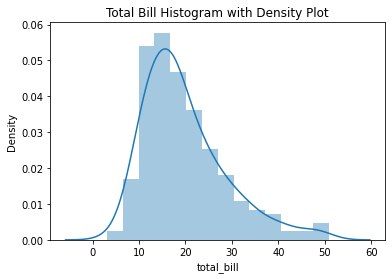

In [20]:
import seaborn as sns

tips = sns.load_dataset("tips")

ax = plt.subplots()
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

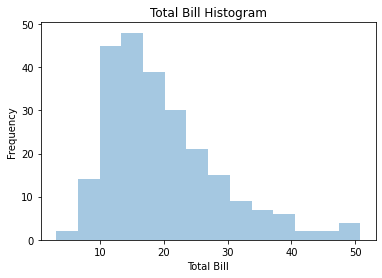

In [21]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde = False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Frequency')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unit Probability')

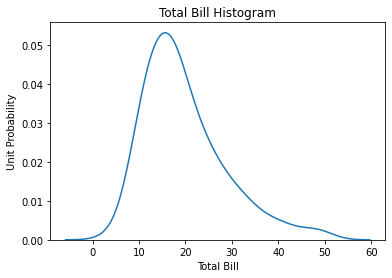

In [22]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], hist = False)
ax.set_title('Total Bill Histogram')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total Bill')

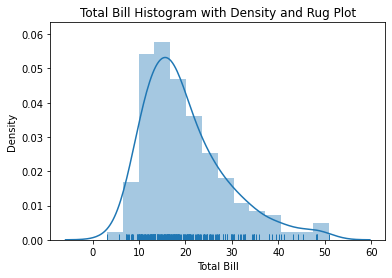

In [23]:
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plot')
ax.set_xlabel('Total Bill')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

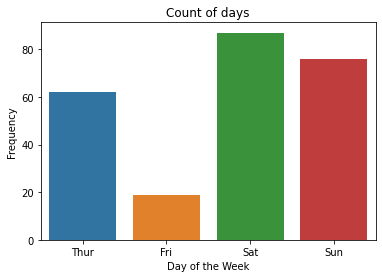

In [24]:
ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Tip')

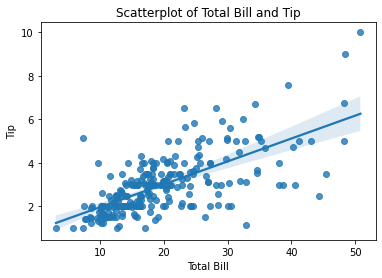

In [25]:
# 산점도 그래프

ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips) 
ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip')

Text(0, 0.5, 'Tip')

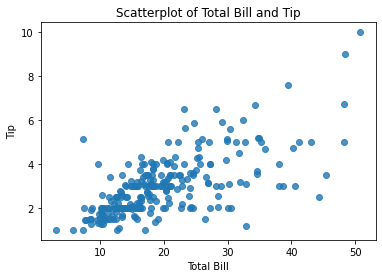

In [26]:
ax = plt.subplots() 
ax = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=False) 
ax.set_title('Scatterplot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip') 

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

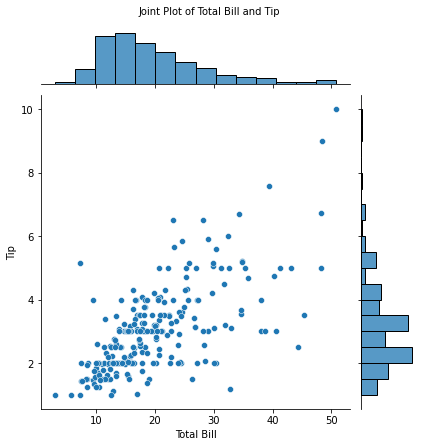

In [27]:
# jointplot : 산점도 + 히스토그램

joint = sns.jointplot(x='total_bill', y='tip', data=tips) 
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

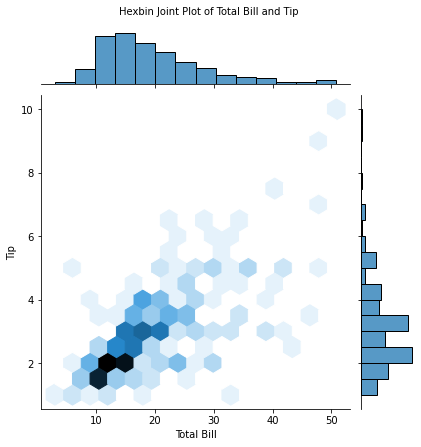

In [28]:
# 육각그래프 + 히스토그램
hexbin = sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex") 
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1681: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tip')

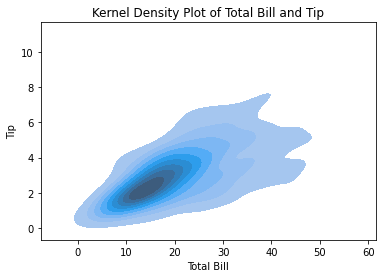

In [29]:
# 이차원 밀집도

kde, ax = plt.subplots() 
ax = sns.kdeplot(data=tips['total_bill'],
                 data2=tips['tip'], 
                 shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip') 
ax.set_xlabel('Total Bill') 
ax.set_ylabel('Tip') 

Text(0, 0.5, 'Average total bill')

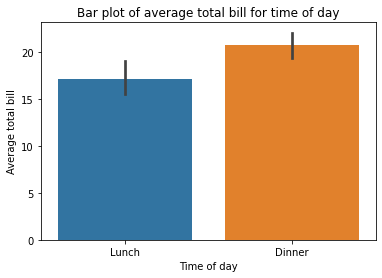

In [30]:
# 바 그래프

ax = plt.subplots() 
ax = sns.barplot(x='time', y='total_bill', data=tips) 
ax.set_title('Bar plot of average total bill for time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Average total bill')

Text(0, 0.5, 'Total Bill')

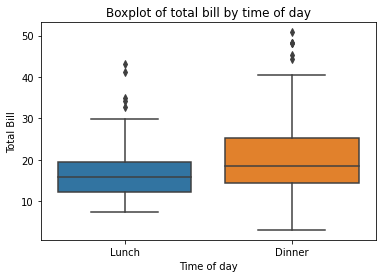

In [31]:
# 박스 그래프

ax = plt.subplots() 
ax = sns.boxplot(x='time', y='total_bill', data=tips) 
ax.set_title('Boxplot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill') 

Text(0, 0.5, 'Total Bill')

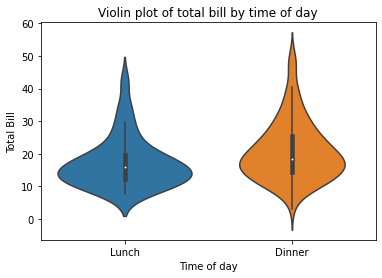

In [32]:
# 바이올린 그래프

ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', data=tips) 
ax.set_title('Violin plot of total bill by time of day') 
ax.set_xlabel('Time of day') 
ax.set_ylabel('Total Bill')

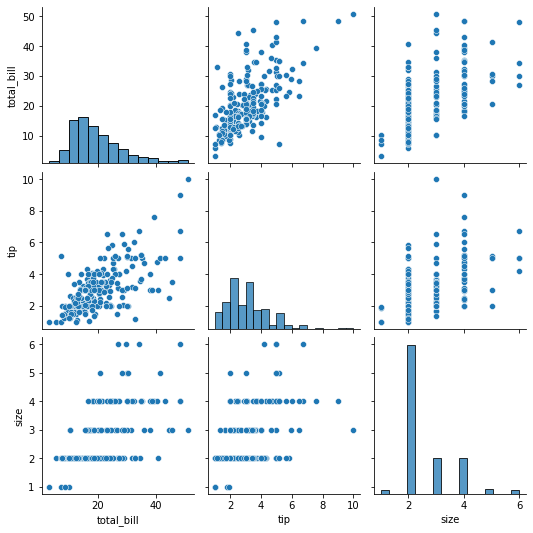

In [33]:
# 관계 그래프

fig = sns.pairplot(tips)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

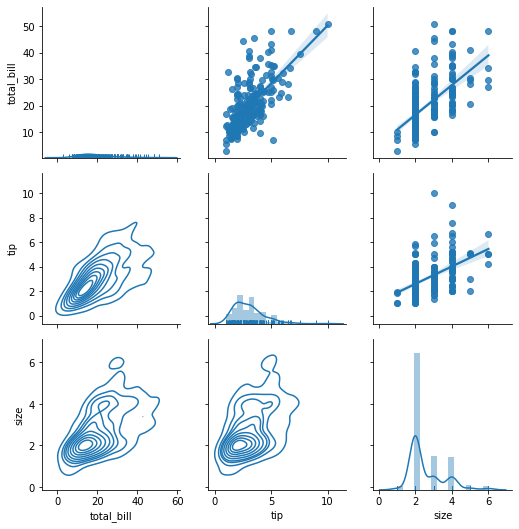

In [34]:
# 중복되는 그래프를 다른 그래프로 대체

pair_grid = sns.PairGrid(tips) 
pair_grid = pair_grid.map_upper(sns.regplot) 
pair_grid = pair_grid.map_lower(sns.kdeplot) 
pair_grid = pair_grid.map_diag(sns.distplot, rug=True) 
plt.show()

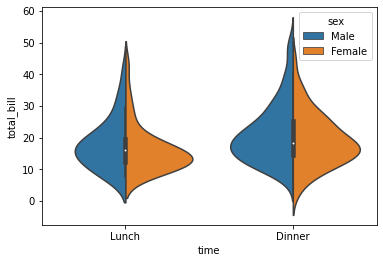

In [35]:
# 다변량 그래프

violin, ax = plt.subplots() 
ax = sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True) 
plt.show()

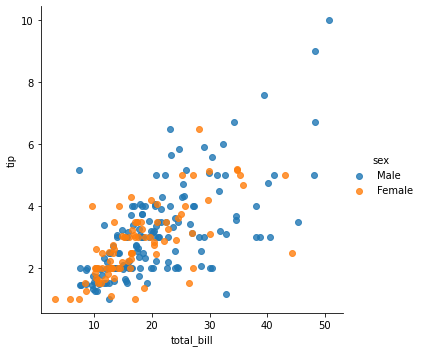

In [36]:
# 산점도, 관계 그래프 - 색상 추가

scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False) 
plt.show()

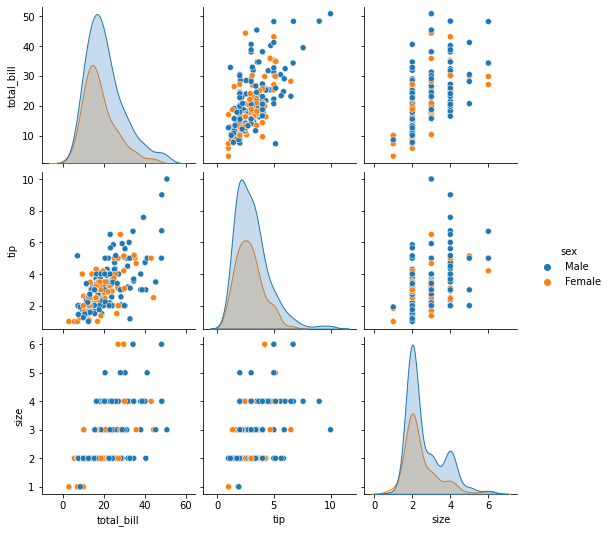

In [37]:
fig = sns.pairplot(tips, hue='sex')

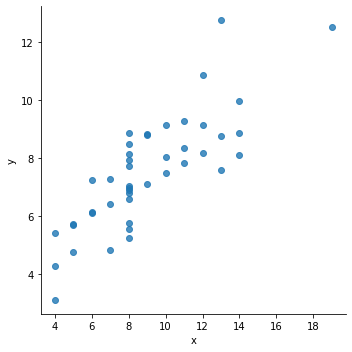

In [46]:
# lmplot 메서드로 데이터 그룹에 대한 그래프 한 번에 그리기

anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False)

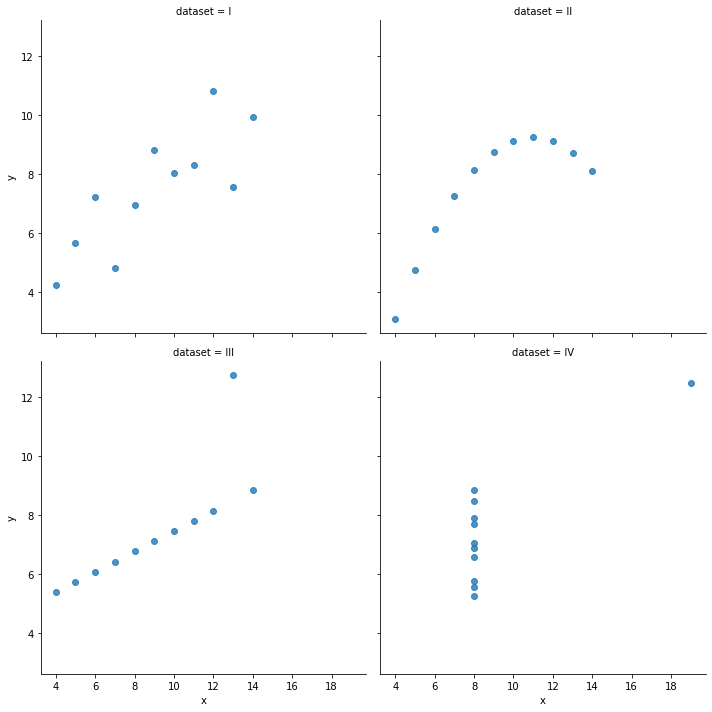

In [47]:
# col : 데이터 그룹 구분할 열
# col_wrap  그래프 그릴 열의 최댓값 지정
anscombe_plot = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

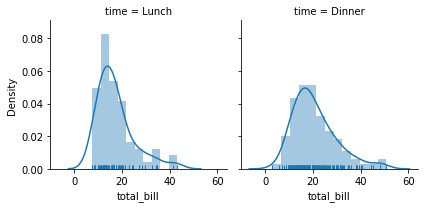

In [48]:
# facet으로 그룹별 그래프 그리기

facet = sns.FacetGrid(tips, col='time') 
facet.map(sns.distplot, 'total_bill', rug=True) 

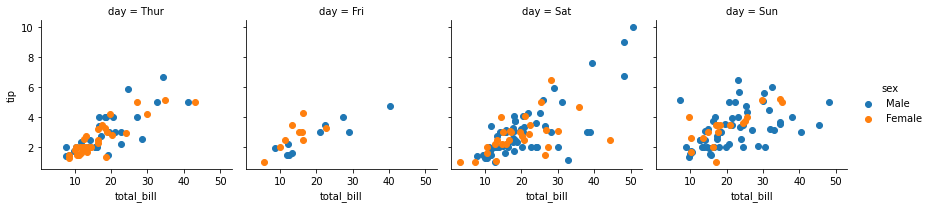

In [49]:
# facet으로 다변량 그래프 그리기

facet = sns.FacetGrid(tips, col='day', hue='sex') 
facet = facet.map(plt.scatter, 'total_bill', 'tip') 
facet = facet.add_legend() 

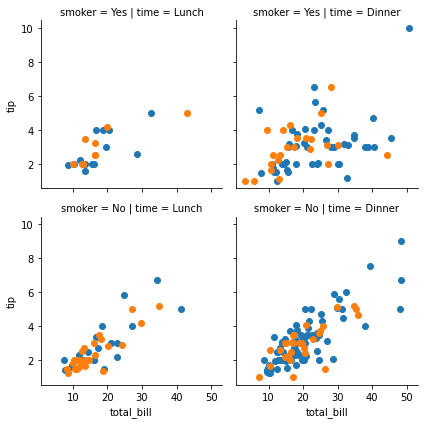

In [50]:
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex') 
facet.map(plt.scatter, 'total_bill', 'tip') 